### Project-Low Yin Jin | 210142423I |PE01

### Q1

In [688]:
import warnings
warnings.filterwarnings("ignore")

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [690]:
orgdata= pd.read_csv("./dataset/worker_productivity.csv", skipinitialspace= True)
orgdata.shape

(1197, 16)

### Preparation & Intial EDA

In [691]:
print("\033[94mData Info", "\n- - - - - - - - - ", "\033[93m")
orgdata.info()

Data Info 
- - - - - - - - -  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    11

In [692]:
#Display the First 5 rows of the dataset
orgdata.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,01-01-15,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,high
1,01-01-15,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,high
2,01-01-15,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,high
3,01-01-15,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,high
4,01-01-15,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,high


In [693]:
#Look for columns with null value
orgdata.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
productivity               0
dtype: int64

In [694]:
orgdata.duplicated().sum()

0

In [695]:
print("\033[94mAttribute Information \n- - - - - - - - - - - - - - - - - - - - - -\033[95m\n01 date: Date in MM- DD- yyyy \n02 day: Day of the Week \n03 quarter: A month was divided into four quarters \n04 department: Associated department with the instance \n05 teamno: Associated team number \n08 targetedproductivity: Targeted productivity set by the Authority for each team for each day \n09 smv: Standard Minute Value its the allocated time for a task \n11 overtime: Represents the amount of overtime by each team in minutes \n12 incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action \n13 idletime: The amount of time when the production was interrupted due to several reasons \n14 idlemen: The number of workers who were idle due to production interruption \n15 actual_productivity: The actual % of productivity that was delivered by the workers, it ranges from 0- 1")

Attribute Information 
- - - - - - - - - - - - - - - - - - - - - -
01 date: Date in MM- DD- yyyy 
02 day: Day of the Week 
03 quarter: A month was divided into four quarters 
04 department: Associated department with the instance 
05 teamno: Associated team number 
08 targetedproductivity: Targeted productivity set by the Authority for each team for each day 
09 smv: Standard Minute Value its the allocated time for a task 
11 overtime: Represents the amount of overtime by each team in minutes 
12 incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action 
13 idletime: The amount of time when the production was interrupted due to several reasons 
14 idlemen: The number of workers who were idle due to production interruption 
15 actual_productivity: The actual % of productivity that was delivered by the workers, it ranges from 0- 1


#### Date

In [696]:
orgdata.date.value_counts()

03-11-15     24
1/31/2015    24
03-10-15     23
01-12-15     23
01-11-15     23
1/24/2015    23
1/13/2015    22
03-08-15     22
1/22/2015    22
03-09-15     22
01-07-15     22
01-05-15     22
01-10-15     22
03-03-15     22
01-08-15     22
01-06-15     21
1/17/2015    21
1/25/2015    21
03-04-15     21
2/28/2015    21
2/25/2015    21
1/14/2015    21
01-03-15     21
01-04-15     21
2/26/2015    21
2/18/2015    21
1/28/2015    21
1/27/2015    21
2/22/2015    20
03-02-15     20
2/17/2015    20
1/29/2015    20
03-01-15     20
2/19/2015    20
03-07-15     19
1/15/2015    19
02-01-15     19
02-08-15     19
2/15/2015    19
2/24/2015    19
02-10-15     19
02-12-15     19
1/26/2015    19
02-02-15     19
03-05-15     19
02-07-15     19
02-04-15     19
01-01-15     19
02-11-15     19
02-03-15     19
2/23/2015    19
1/19/2015    19
1/21/2015    19
1/18/2015    19
2/16/2015    18
02-05-15     18
02-09-15     18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64

In [697]:
#Convert to datetime object
orgdata.date= pd.to_datetime(orgdata.date)

In [698]:
orgdata.date.value_counts()

2015-01-31    24
2015-03-11    24
2015-01-24    23
2015-03-10    23
2015-01-12    23
2015-01-11    23
2015-03-08    22
2015-03-09    22
2015-01-22    22
2015-01-05    22
2015-01-10    22
2015-03-03    22
2015-01-07    22
2015-01-08    22
2015-01-13    22
2015-01-28    21
2015-01-17    21
2015-01-27    21
2015-01-04    21
2015-01-06    21
2015-02-18    21
2015-03-04    21
2015-01-03    21
2015-01-14    21
2015-01-25    21
2015-02-28    21
2015-02-25    21
2015-02-26    21
2015-02-22    20
2015-02-19    20
2015-02-17    20
2015-03-02    20
2015-01-29    20
2015-03-01    20
2015-01-18    19
2015-03-07    19
2015-02-01    19
2015-02-12    19
2015-02-24    19
2015-02-10    19
2015-03-05    19
2015-01-19    19
2015-02-23    19
2015-01-21    19
2015-02-11    19
2015-02-02    19
2015-02-08    19
2015-02-07    19
2015-02-03    19
2015-01-15    19
2015-01-26    19
2015-02-15    19
2015-01-01    19
2015-02-04    19
2015-02-16    18
2015-02-09    18
2015-02-05    18
2015-02-14    17
2015-01-20    

#### Quarter

In [699]:
orgdata.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

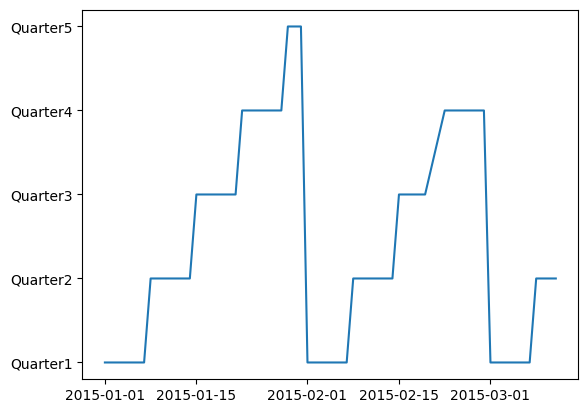

In [700]:
plt.plot(orgdata.date, orgdata.quarter)

In [701]:
data_test1= orgdata[orgdata.quarter== "Quarter5"]
data_test1.shape

(44, 16)

In [702]:
#Quarter5 contains 29th and 30th of the month
data_test1.date.value_counts()

2015-01-31    24
2015-01-29    20
Name: date, dtype: int64

#### Department

In [703]:
orgdata.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [704]:
#Remove whitespace in department
def strip(string):
 return string.strip()

orgdata.department= orgdata.department.apply(strip)

#Replacing sweing with the correct spelling sewing
data= orgdata.replace(["sweing"], ["sewing"])

In [705]:
orgdata.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

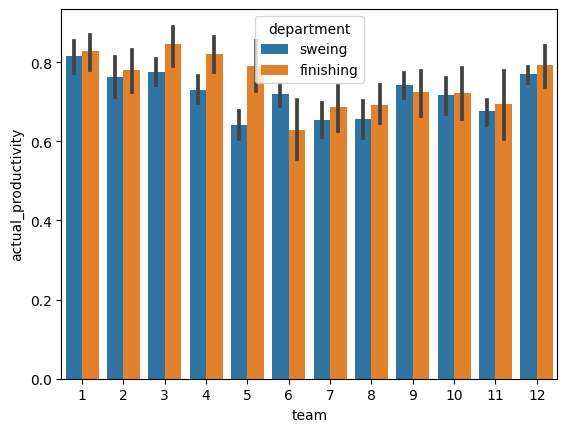

In [706]:
sns.barplot(x= orgdata.team, y= orgdata.actual_productivity, hue= orgdata.department)
plt.show()

#### Day

In [707]:
#Friday is an off day
orgdata.day.value_counts()


Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

#### Team

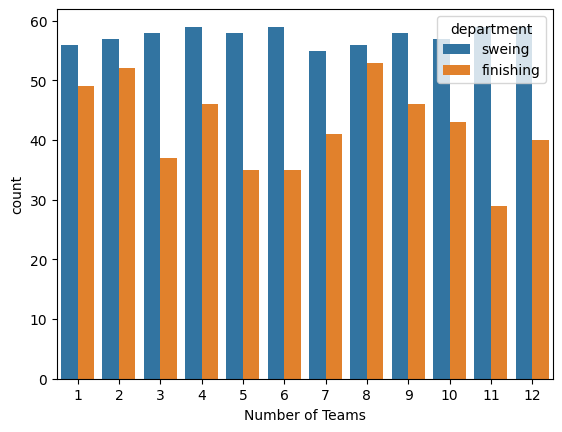

In [708]:
sns.countplot(x= orgdata.team, hue= orgdata.department)
plt.xlabel("Number of Teams")
plt.show()

#### Productivity

In [709]:
orgdata.productivity.value_counts()

high      559
medium    422
low       216
Name: productivity, dtype: int64

#### SMV (Standard Minute Value)

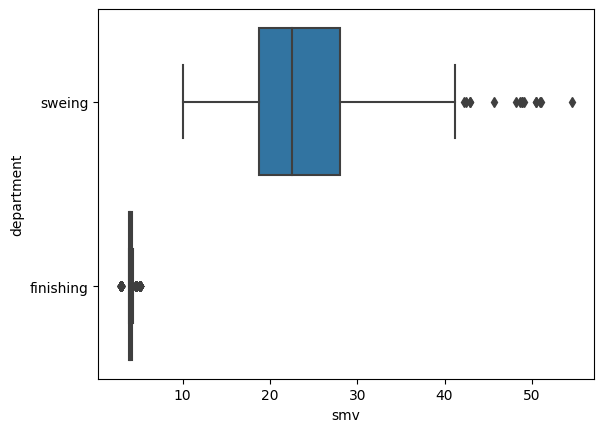

In [710]:
sns.boxplot(x= orgdata.smv, y= orgdata.department)
plt.show()

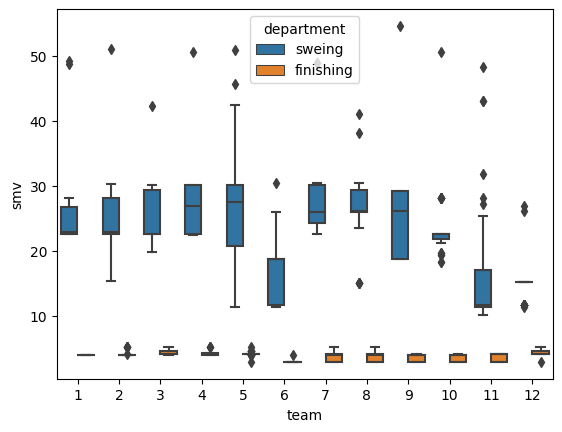

In [711]:
sns.boxplot(x= orgdata.team, y= orgdata.smv, hue= orgdata.department)
plt.show()

#### WIP (Work In Progress)

In [712]:
orgdata.wip.isnull().sum()

506

In [713]:
data_test2= orgdata[orgdata.wip.isnull()]
data_test2.shape

(506, 16)

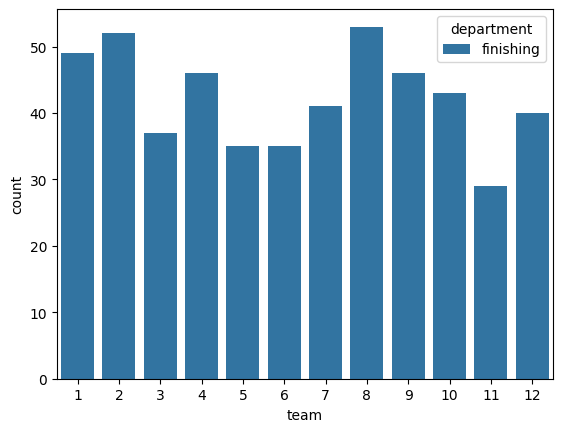

In [714]:
#Null values all under the finishing deprtment
sns.countplot(x= data_test2.team, hue= data_test2.department)
plt.show()

In [715]:
data= orgdata.drop(columns= "wip")

In [716]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
productivity             0
dtype: int64

#### Overtime

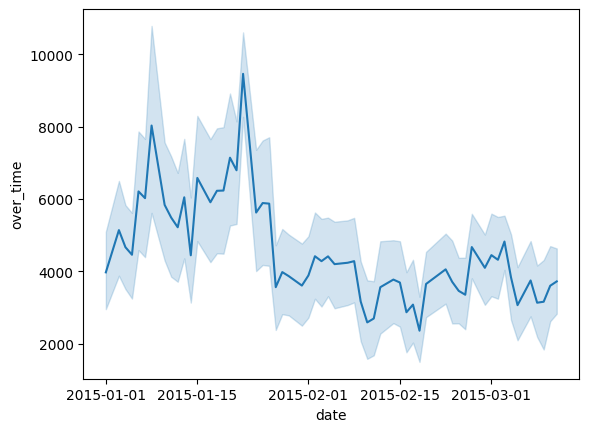

In [717]:
sns.lineplot(x= data.date, y= data.over_time)
plt.show()

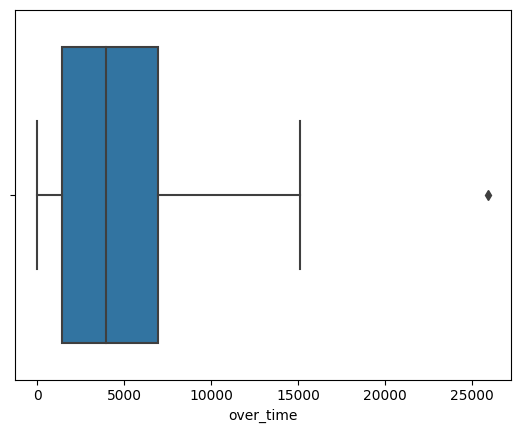

In [718]:
sns.boxplot(x= data.over_time)
plt.show()

#### Incentive

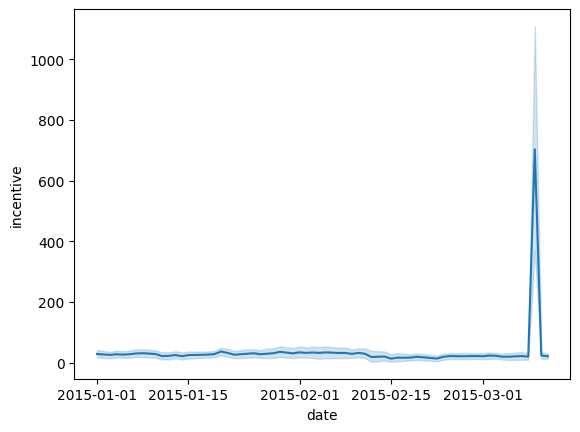

In [719]:
sns.lineplot(x= data.date, y= data.incentive)
plt.show()

#### Idletime

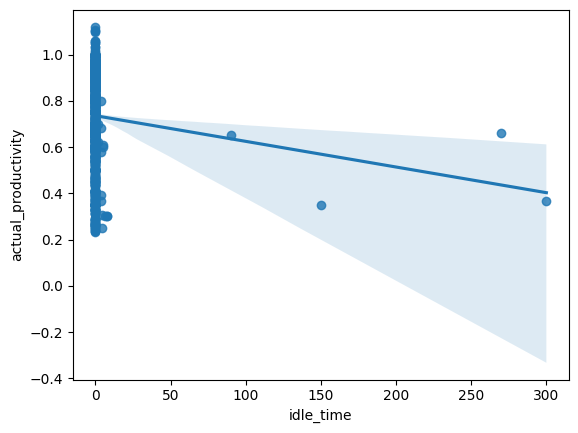

In [720]:
sns.regplot(x= data.idle_time, y= data.actual_productivity)
plt.show()

### Idlemen

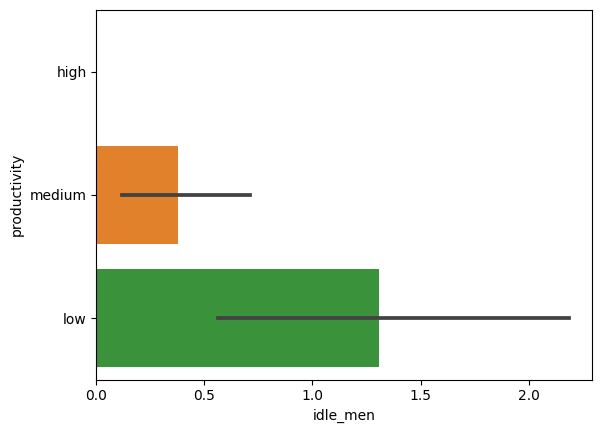

In [721]:
sns.barplot(x= data.idle_men, y= data.productivity)
plt.show()

#### Noofsylechange

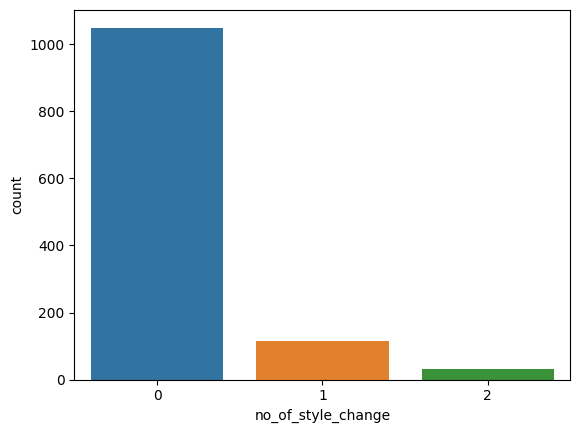

In [722]:
sns.countplot(x= data.no_of_style_change)
plt.show()

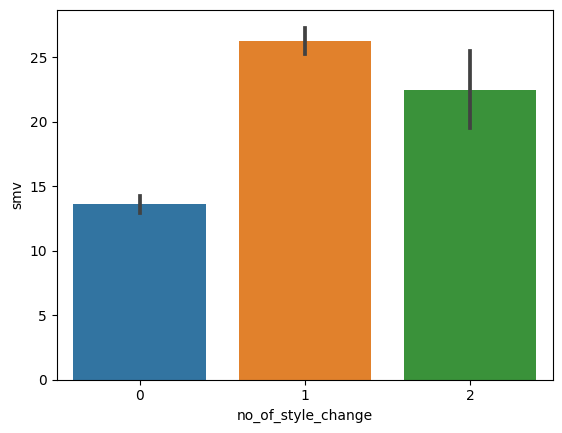

In [723]:
sns.barplot(x= data.no_of_style_change, y= data.smv)
plt.show()

#### Noofworkers

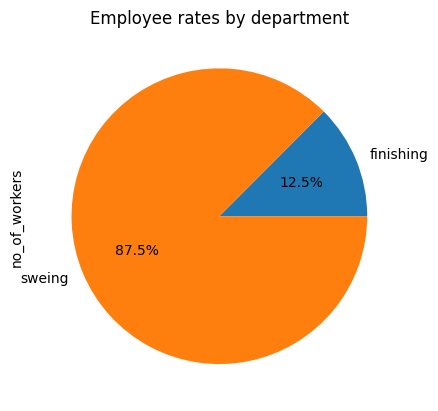

In [724]:
dataplot= data.groupby(data.department).no_of_workers.sum()
dataplot.plot.pie(title= "Employee rates by department", autopct= "%1.1f%%")
plt.show()

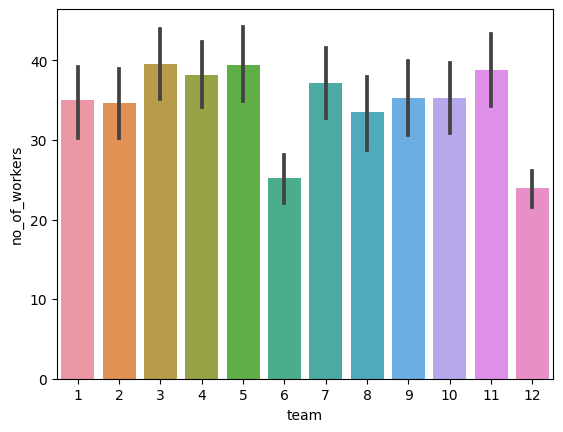

In [725]:
sns.barplot(x= data.team, y= data.no_of_workers)
plt.show()

####  Actualproductivity, Productivity & Targetedproductivity

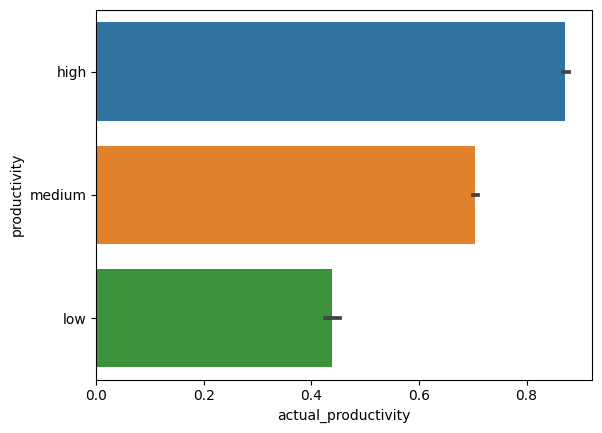

In [726]:
sns.barplot(x= data.actual_productivity, y= data.productivity)
plt.show()

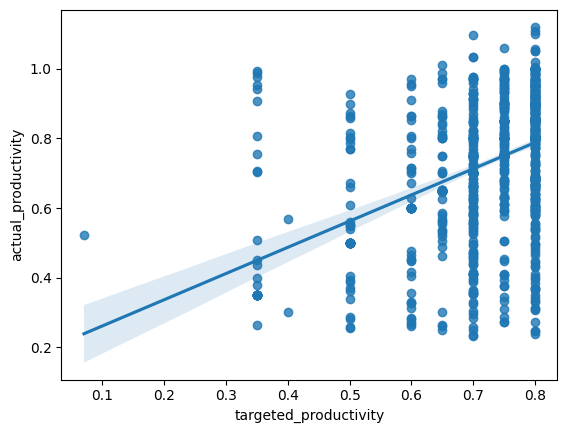

In [727]:
sns.regplot(x= data.targeted_productivity, y= data.actual_productivity)
plt.show()

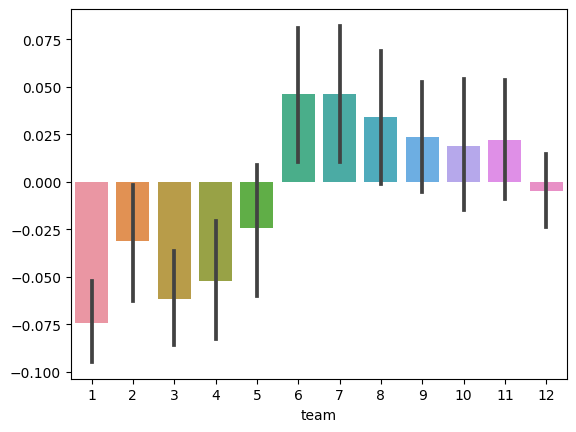

In [728]:
sns.barplot(x= data.team, y= data.targeted_productivity - 
data.actual_productivity)
plt.show()

### Feature Selection

####  Encoding 

In [729]:
encodeddata= data.copy()
encodeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   over_time              1197 non-null   int64         
 8   incentive              1197 non-null   int64         
 9   idle_time              1197 non-null   float64       
 10  idle_men               1197 non-null   int64         
 11  no_of_style_change     1197 non-null   int64         
 12  no_of_workers          1197 non-null   float64       
 13  act

In [730]:
#define class "preparation" to encode the dataframe
class preparation:
 def encoding(self, data):
  #define an empty dictionary to store the columns names and the functions used
  self.dict= {}
  for col_name in data:
   dtype= str(data[col_name].dtype)
   #Select float columns for scaling
   if dtype.find("float") != -1:
    self.dict[col_name]= StandardScaler()
    col= data[col_name]
    #Get the non-null values of the column
    col_notna= col[col.notnull()]
    #Reshape the column into an numpy array that has a shape of (-1, 1)
    reshaped= col_notna.values.reshape(-1, 1)
    #Encode the array that was reshaped
    encoded= self.dict[col_name].fit_transform(reshaped)
    #Replace the original data with encoded data
    data.loc[col.notnull(), col_name]= np.squeeze(encoded)
   
   elif dtype.find("int") != -1:
    continue
   
   else:
    self.dict[col_name]= LabelEncoder()
    col= data[col_name]
    #Get the non-null values of the column
    col_notna= col[col.notnull()]
    #Reshape the column into an numpy array that has a shape of (-1, 1)
    reshaped= col_notna.values.reshape(-1, 1)
    #Encode the array that was reshaped
    encoded= self.dict[col_name].fit_transform(reshaped)
    #Replace the original data with encoded data
    data.loc[col.notnull(), col_name]= np.squeeze(encoded)
    
  return data

In [731]:
data.head(5)


,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,high
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,high
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,high
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,high
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,high


In [732]:
#Encode the dataset
enc= preparation()
enc.encoding(encodeddata)
encodeddata.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,0,0,1,3,8,0.719137,1.014552,7080,98,-0.057473,0,0,1.099229,1.178994,0
1,0,0,0,3,1,0.208151,-1.016778,960,0,-0.057473,0,0,-1.199268,0.868096,0
2,0,0,1,3,11,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,0
3,0,0,1,3,12,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,0
4,0,0,1,3,6,0.719137,0.990783,1920,50,-0.057473,0,0,0.964023,0.374342,0


In [733]:
data.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [734]:
encodeddata.day.value_counts()

5    208
2    203
4    201
3    199
0    199
1    187
Name: day, dtype: int64

In [735]:
encodeddata.day= encodeddata.day.replace([5, 2, 4, 3, 0, 1], [3, 7, 2, 1, 4, 42])

In [736]:
encodeddata.day.value_counts()

3     208
7     203
2     201
4     199
1     199
42    187
Name: day, dtype: int64

In [737]:
data.productivity.value_counts()

high      559
medium    422
low       216
Name: productivity, dtype: int64

In [738]:
encodeddata.productivity.value_counts()

0    559
2    422
1    216
Name: productivity, dtype: int64

In [739]:
encodeddata.productivity= encodeddata.productivity.replace([0, 2, 1], [2, 1, 0])

In [740]:
encodeddata.productivity.value_counts()

2    559
1    422
0    216
Name: productivity, dtype: int64

In [741]:
data.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [742]:
data.team.value_counts()

8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [743]:
encodeddata.team.value_counts()

8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [744]:
encodeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int32  
 2   department             1197 non-null   int32  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  productivity           1197 non-null   int64  
dtypes: f

In [745]:
encodeddata.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'productivity'],
      dtype='object')

In [746]:
print(data.productivity.value_counts(), "\n")
print(encodeddata.productivity.value_counts())

high      559
medium    422
low       216
Name: productivity, dtype: int64 

2    559
1    422
0    216
Name: productivity, dtype: int64


### Futher EDA

In [747]:
import plotly.express as pe
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [748]:
encodeddata.head(1)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,0,0,1,1,8,0.719137,1.014552,7080,98,-0.057473,0,0,1.099229,1.178994,2


In [749]:
fig= pe.pie(names= encodeddata.team)
fig.update_layout(title= "<b>Proportion Of Teams<b>")
fig.show()

In [750]:
fig= pe.scatter(x= encodeddata.targeted_productivity, y= encodeddata.actual_productivity, color= encodeddata.productivity, title= "Productivity sample distribution based on targeted productivity and actual productivity", color_discrete_sequence= ["Blue", "Orange", "green"])
fig.show()

In [751]:
count= encodeddata.quarter.value_counts().reset_index()
count.rename(columns= {"index": "quarters", "quarter": "days_in_each_quarter"}, inplace= True)
fig= go.Figure(data= [go.Pie(labels= count.quarters.to_list(), values= count.days_in_each_quarter.to_list(), pull= [0, 0, 0, 0, 0.2])])
fig.show()

In [752]:
#Create subplots
fig= make_subplots(rows= 1, cols= 2)

fig.update_layout(title= "Left- Targeted Productivity         Actual Productivity- Right", title_x= 0.5)
#Add targeted productivity histogram to first subplot
fig.add_trace(go.Histogram(x= encodeddata.targeted_productivity, nbinsx= 20), row= 1, col= 1)
#Add actual productivity histogram to second subplot
fig.add_trace(go.Histogram(x= encodeddata.actual_productivity, nbinsx= 20), row= 1, col= 2)

#Show figure
fig.show()


In [753]:
daydf= encodeddata[["day", "actual_productivity"]].groupby("day").mean()
daydf= daydf.sort_values("actual_productivity", ascending= False).reset_index()
fig= pe.bar(daydf, x= "day", y= "actual_productivity",
             hover_data= ["day", "actual_productivity"], color= "actual_productivity",
             labels= {"actual_productivity":"Productivity"}, height= 500)
fig.show()


data

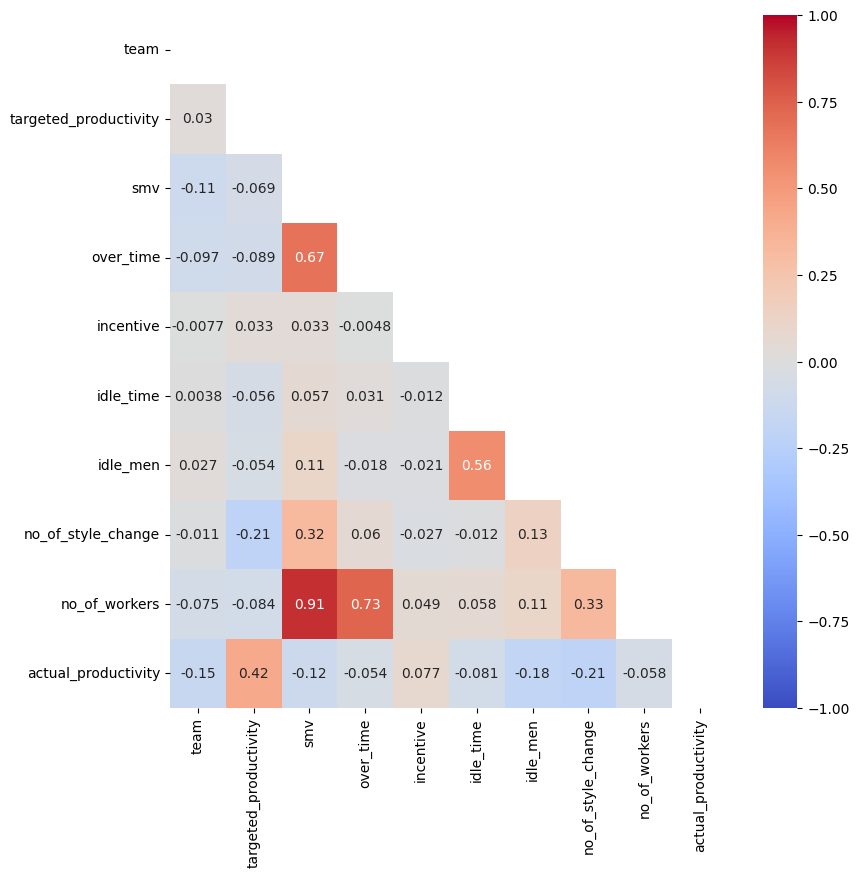

In [754]:
corr= data.corr()
mask= np.zeros(corr.shape, dtype= bool)
mask[np.triu_indices(len(mask))]= True
plt.figure(figsize= (9, 9))
sns.heatmap(corr, annot= True, mask= mask, vmin= - 1, vmax= 1, cmap= "coolwarm")
plt.show()

<span style= "color: #fae85c">
smv noofworker- 0.91<br>
noofworker overtime- 0.73<br>
smv overtime- 0.427<br>
idlemen idletime- 0.542<br>
</span>

encodeddata

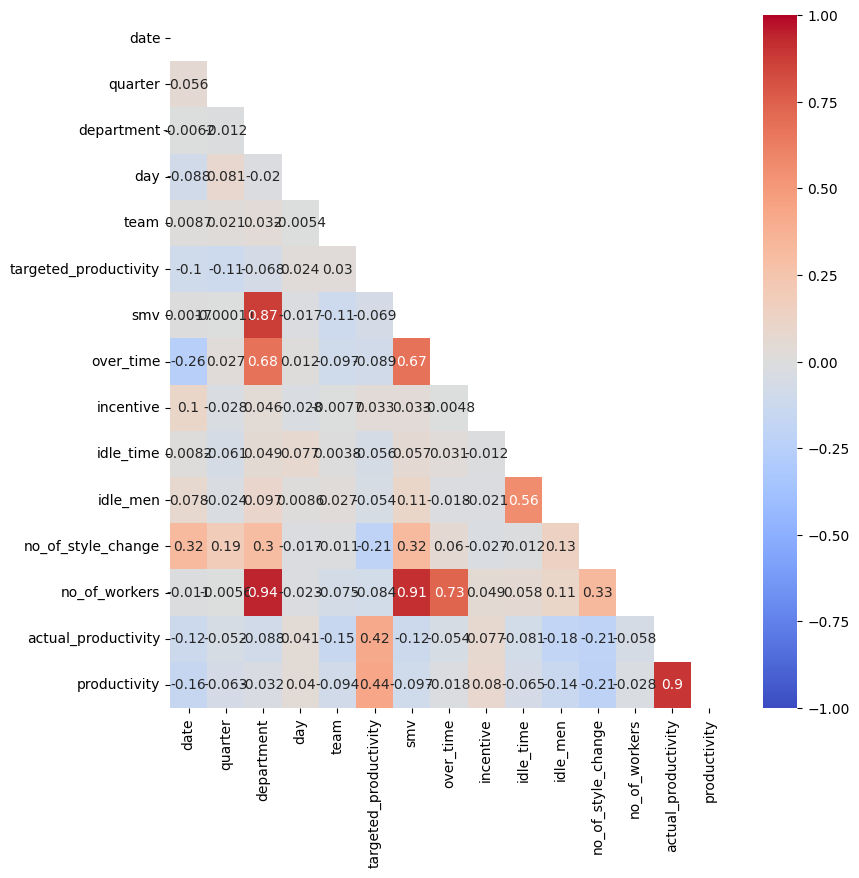

In [755]:
corr= encodeddata.corr()
mask= np.zeros(corr.shape, dtype= bool)
mask[np.triu_indices(len(mask))]= True
plt.figure(figsize= (9, 9))
sns.heatmap(corr, annot= True, mask= mask, vmin= - 1, vmax= 1, cmap= "coolwarm")
plt.show()

### Spitting the data & Feature Selection

In [756]:
encodeddata.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,0,0,1,1,8,0.719137,1.014552,7080,98,-0.057473,0,0,1.099229,1.178994,2
1,0,0,0,1,1,0.208151,-1.016778,960,0,-0.057473,0,0,-1.199268,0.868096,2
2,0,0,1,1,11,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,2
3,0,0,1,1,12,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,2
4,0,0,1,1,6,0.719137,0.990783,1920,50,-0.057473,0,0,0.964023,0.374342,2


### Split the dataset to a clean and clean test dataset

In [757]:
test= encodeddata.sample(frac= 0.015, random_state= 42)
clean= encodeddata[~encodeddata.index.isin(test.index)]
print(test.shape, "\n", clean.shape)

(18, 15) 
 (1179, 15)


In [758]:
test.to_csv("./dataset/worker_productivity_cleantest.csv", index= False)
clean.to_csv("./dataset/worker_productivity_clean.csv", index= False)

In [759]:
#Split data into features and variables to predict and convert both to numpy array
x= clean.drop(["actual_productivity", "productivity", "date"], axis= 1).to_numpy()
y= clean["productivity"].to_numpy()

In [760]:
print(x.shape)
print(y.shape)

(1179, 12)
(1179,)


In [761]:
#Split data into x_train, x_test, y, y_test with test sample 25%
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state= 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(884, 12) (295, 12) (884,) (295,)


In [762]:
#Make use of SMOTE to balance the highly biased data
from imblearn.over_sampling import SMOTE

oversample= SMOTE()
#Resample both train and test datasets
x_train, y_train= oversample.fit_resample(x_train, y_train.ravel())
x_test, y_test= oversample.fit_resample(x_test, y_test.ravel())
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1236, 12) (417, 12) (1236,) (417,)


SMOTE

Select a minority class sample at random. Identify k-nearest neighbors (k is a user-specified parameter) of the selected sample from the minority class. Generate synthetic samples by randomly selecting one of the k-nearest neighbors and computing the difference between that sample and the selected sample. This difference is multiplied by a random number between 0 and 1 and added to the selected sample. Repeat the process for a user-specified number of synthetic samples to create.

###  Finding the Best Model

The models to be evaluated 
1. Logistic Regression(LR)
2. Decision Tree Classifier(DT)
3. Random Forest Classifier(RF)
4. Support Vector Machines(SVM)
5. 1D CNN

The "micro" averaging approach calculates the overall metric by treating each class as a binary classification problem and summing the true positives, false positives, and false negatives for all classes. This approach takes into account the class imbalance in the dataset.

In [763]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from tensorflow.keras import models

import matplotlib.pyplot as plt
import joblib

####  1. Logistic Regression(LR)

In [764]:
def logistic(filename= ""):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score
    #Create the model
    model= LogisticRegression(multi_class= "ovr", random_state= 42)  #OneVsRest
    #Fit the model on the training data
    model.fit(x_train, y_train)

    #Make predictions on the test data
    y_pred= model.predict(x_test)

    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average= "micro")
    recall= recall_score(y_test, y_pred, average= "micro")
    f1= f1_score(y_test, y_pred, average= "micro")
    report= classification_report(y_test, y_pred)
    confusion_matrix= confusion_matrix(y_test, y_pred)
    prediction= y_pred[:25]
    test= y_test[:25]

    #Plot the confusion matrix
    matrix= plot_confusion_matrix(model, x_test, y_test, cmap= plt.cm.Blues, normalize= None)
    plt.show(matrix)
    
    joblib.dump(model, filename)

    return accuracy, precision, recall, report, matrix, prediction, test, f1

Using x_train and y_train
Evaluate model with ovr and liblinear


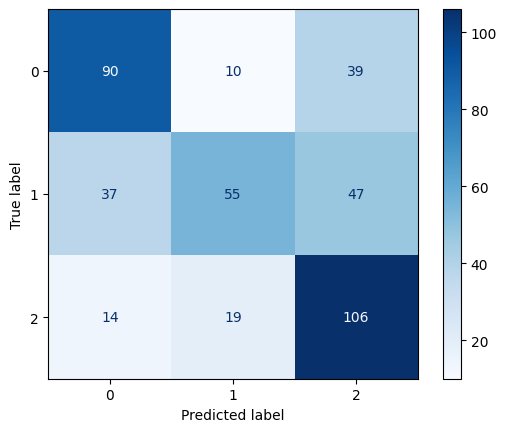

train accuracy: 0.602 | train precision: 0.602 | train recall: 0.602 | train f1 score: 0.602
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       139
           1       0.65      0.40      0.49       139
           2       0.55      0.76      0.64       139

    accuracy                           0.60       417
   macro avg       0.62      0.60      0.59       417
weighted avg       0.62      0.60      0.59       417

[2 2 2 1 2 2 2 0 0 2 1 2 1 2 1 2 2 2 2 0 0 2 2 0 0]
[0 2 2 1 2 2 1 0 2 2 1 2 2 2 0 2 2 2 1 1 1 2 2 0 1]


In [765]:
print("Using x_train and y_train")
print("Evaluate model with ovr and liblinear")
accuracy, precision, recall, report, matrix, prediction, test, f1= logistic(filename= "model/LR.pkl")
print("train accuracy: %.3f | train precision: %.3f | train recall: %.3f | train f1 score: %.3f" %
(accuracy, precision, recall, f1))
print(report)
plt.show()
print(prediction)
print(test)

####  2. Decision Tree(DT)

DT divides the data into smaller and smaller sections based on the feature. To build a model that can predict the target label by learning simple decision rules based on data attributes. It begins at the root node and makes a choice based on the feature. Based on the decision taken at the root node, the data is then sent to the left or right child nodes. This process is repeated until the data reaches a leaf node, which represents the decision tree's prediction.

max_depth= the maximum depth of tree

In [766]:
def decisiontree(filename= ""):
    #Import required modules
    from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score
    from sklearn.model_selection import GridSearchCV

    #Create the model
    model= DecisionTreeClassifier()

    #Train a decision tree model with the optimal maximum depth
    model= DecisionTreeClassifier(max_depth= 10, random_state= 42)
    #Fit the model on the training data
    model.fit(x_train, y_train)
    #Make predictions on the test data
    y_pred= model.predict(x_test)

    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average= "micro")
    recall= recall_score(y_test, y_pred, average= "micro")
    f1= f1_score(y_test, y_pred, average= "micro")
    report= classification_report(y_test, y_pred)
    confusion_matrix= confusion_matrix(y_test, y_pred)
    prediction= y_pred[:25]
    test= y_test[:25]
    
    #Plot the confusion matrix
    matrix= plot_confusion_matrix(model, x_test, y_test, cmap= plt.cm.Blues, normalize= None)
    plt.show(matrix)
    
    joblib.dump(model, filename)

    return accuracy, precision, recall, report, matrix, prediction, test, f1


Using x_train and y_train


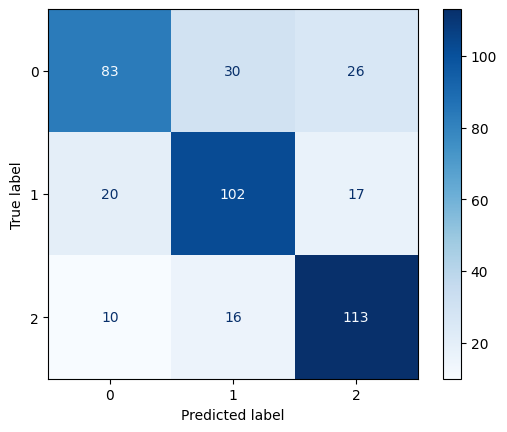

train accuracy: 0.715 | train precision: 0.715 | train recall: 0.715 | train f1 score: 0.715
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       139
           1       0.69      0.73      0.71       139
           2       0.72      0.81      0.77       139

    accuracy                           0.71       417
   macro avg       0.72      0.71      0.71       417
weighted avg       0.72      0.71      0.71       417

[2 2 2 1 2 2 1 0 0 2 1 2 0 2 1 2 2 2 0 0 1 2 2 0 1]
[0 2 2 1 2 2 1 0 2 2 1 2 2 2 0 2 2 2 1 1 1 2 2 0 1]


In [767]:
print("Using x_train and y_train")
accuracy, precision, recall, report, matrix, prediction, test, f1= decisiontree(filename= "model/DT.pkl")
print("train accuracy: %.3f | train precision: %.3f | train recall: %.3f | train f1 score: %.3f" %
(accuracy, precision, recall, f1))
print(report)
plt.show()
print(prediction)
print(test)


####  3. Random Forest(RF)
n_estimators= numbers of trees 

In [768]:
def randomforest(n_estimators, filename= ""):
    #Import required modules
    from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score
    #Create the model
    model= RandomForestClassifier(n_estimators= n_estimators, random_state= 42)
    #Fit the model on the training data
    model.fit(x_train, y_train)
    #Make predictions on the test data
    y_pred= model.predict(x_test)

    #Calculate evaluation metrics
    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average= "micro")
    recall= recall_score(y_test, y_pred, average= "micro")
    f1= f1_score(y_test, y_pred, average= "micro")
    report= classification_report(y_test, y_pred)
    confusion_matrix= confusion_matrix(y_test, y_pred)
    prediction= y_pred[:25]
    test= y_test[:25]

    #Plot the confusion matrix
    matrix= plot_confusion_matrix(model, x_test, y_test, cmap= plt.cm.Blues, normalize= None)
    plt.show(matrix)

    joblib.dump(model, filename)

    return accuracy, precision, recall, report, matrix, prediction, test, f1


Using x_train and y_train


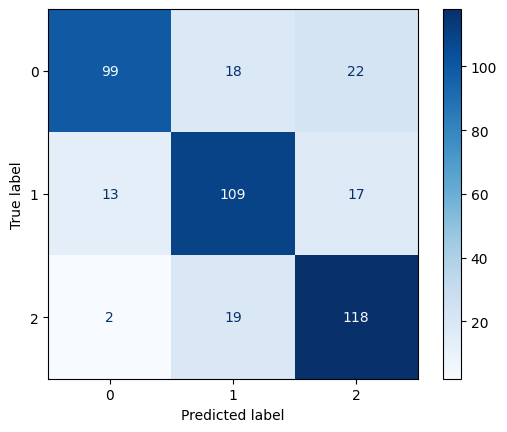

train accuracy: 0.782 | train precision: 0.782 | train recall: 0.782 | train f1 score: 0.782
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       139
           1       0.75      0.78      0.76       139
           2       0.75      0.85      0.80       139

    accuracy                           0.78       417
   macro avg       0.79      0.78      0.78       417
weighted avg       0.79      0.78      0.78       417

[2 2 2 1 2 2 1 0 0 2 1 2 1 2 1 2 2 2 2 1 1 2 2 0 1]
[0 2 2 1 2 2 1 0 2 2 1 2 2 2 0 2 2 2 1 1 1 2 2 0 1]


In [769]:
print("Using x_train and y_train")
accuracy, precision, recall, report, matrix, prediction, test, f1= randomforest(100, filename= "model/RF.pkl")
print("train accuracy: %.3f | train precision: %.3f | train recall: %.3f | train f1 score: %.3f" %
(accuracy, precision, recall, f1))
print(report)
plt.show()
print(prediction)
print(test)


####  4. Support Vector Machines(SVM)

In [770]:
def svm(gamma, C, kernel= "", filename= ""):
    #Import required modules
    from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score
    #Create the model
    model= SVC(kernel= kernel, gamma= gamma, C= C)
    #Fit the model on the training data
    model.fit(x_train, y_train)
    #Make predictions on the test data
    y_pred= model.predict(x_test)

    #Calculate evaluation metrics
    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average= "micro")
    recall= recall_score(y_test, y_pred, average= "micro")
    f1= f1_score(y_test, y_pred, average= "micro")
    report= classification_report(y_test, y_pred)
    confusion_matrix= confusion_matrix(y_test, y_pred)
    prediction= y_pred[:25]
    test= y_test[:25]

    #Plot the confusion matrix
    matrix= plot_confusion_matrix(model, x_test, y_test, cmap= plt.cm.Blues, normalize= None)
    plt.show(matrix)
    
    joblib.dump(model, filename)

    return accuracy, precision, recall, report, matrix, prediction, test, f1


Using x_train and y_train


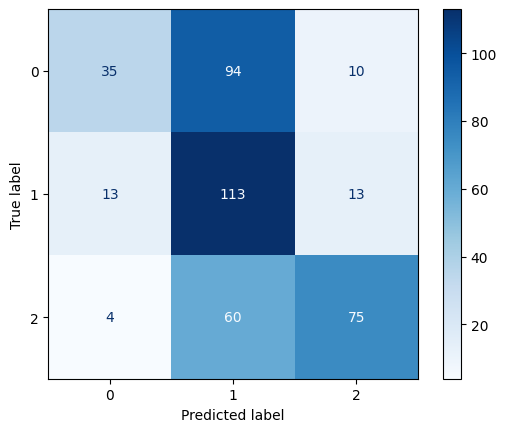

train accuracy: 0.535 | train precision: 0.535 | train recall: 0.535 | train f1 score: 0.535
              precision    recall  f1-score   support

           0       0.67      0.25      0.37       139
           1       0.42      0.81      0.56       139
           2       0.77      0.54      0.63       139

    accuracy                           0.53       417
   macro avg       0.62      0.53      0.52       417
weighted avg       0.62      0.53      0.52       417

[2 2 2 1 1 1 1 1 0 2 1 2 1 2 0 2 1 2 1 0 1 1 2 0 1]
[0 2 2 1 2 2 1 0 2 2 1 2 2 2 0 2 2 2 1 1 1 2 2 0 1]


In [771]:
print("Using x_train and y_train")
accuracy, precision, recall, report, matrix, prediction, test, f1= svm(0.1, 1.0, "rbf", filename= "model/SVM.pkl")
print("train accuracy: %.3f | train precision: %.3f | train recall: %.3f | train f1 score: %.3f" %
(accuracy, precision, recall, f1))
print(report)
plt.show()
print(prediction)
print(test)

####  5. 1D CNN

In [772]:
import tensorflow as tf

In [773]:
print(encodeddata.productivity.unique())

[2 1 0]


In [774]:
labels= pd.get_dummies(y)
cnny= labels.values
cnny

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [775]:
labels= pd.get_dummies(y_train)
cnny_train= labels.values
cnny

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [776]:
labels= pd.get_dummies(y_test)
cnny_test= labels.values
cnny

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [777]:
model= tf.keras.models.Sequential()

model.add(tf.keras.Input(shape= (x.shape[1])))
model.add(tf.keras.layers.Dense(15, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(cnny.shape[1], activation= "softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________


In [778]:
model.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])

In [779]:
history= model.fit(x_train, cnny_train, batch_size= 5, epochs= 100, validation_data= (x_test, cnny_test), verbose= 1)

Epoch 1/100
248/248 [==============================] - 0s 1ms/step - loss: 201.9364 - accuracy: 0.3617 - val_loss: 5.9227 - val_accuracy: 0.3285
Epoch 2/100
248/248 [==============================] - 0s 673us/step - loss: 6.0269 - accuracy: 0.3900 - val_loss: 5.0101 - val_accuracy: 0.3333
Epoch 3/100
248/248 [==============================] - 0s 1ms/step - loss: 6.4041 - accuracy: 0.4094 - val_loss: 2.3174 - val_accuracy: 0.4508
Epoch 4/100
248/248 [==============================] - 0s 843us/step - loss: 4.5807 - accuracy: 0.4086 - val_loss: 7.0747 - val_accuracy: 0.3357
Epoch 5/100
248/248 [==============================] - 0s 770us/step - loss: 4.2400 - accuracy: 0.4474 - val_loss: 2.8422 - val_accuracy: 0.3621
Epoch 6/100
248/248 [==============================] - 0s 991us/step - loss: 4.2675 - accuracy: 0.4328 - val_loss: 2.6477 - val_accuracy: 0.3909
Epoch 7/100
248/248 [==============================] - 0s 782us/step - loss: 3.9734 - accuracy: 0.4320 - val_loss: 1.7349 - val_accu

In [780]:
model.save("model/1DCNN.h5")

In [781]:
score= model.evaluate(x_test, cnny_test)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

14/14 [==============================] - 0s 617us/step - loss: 0.9197 - accuracy: 0.5516
Test Score: 0.9197120666503906
Test Accuracy: 0.5515587329864502


In [782]:
clean.productivity.value_counts()

2    551
1    414
0    214
Name: productivity, dtype: int64

In [783]:
#Initialize lists to store the predicted and original labels
predicted_labels= []
original_labels= []

#Predict the model
cpredict= model.predict(x_test)

labels= [2, 1, 0]

#Iterate through the predicted and original labels
for i, y in zip(cpredict[:25], cnny_test[:25]):
    #Invert the labels using the argmax function
    invertedy= np.argmax(y)
    invertedp= np.argmax(i)
    
    #Append the inverted labels to the lists
    predicted_labels.append(labels[invertedp])
    original_labels.append(labels[invertedy])

#Print the lists
print("Predicted labels:", predicted_labels)
print("Original labels:", original_labels)

Predicted labels: [1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2]
Original labels: [2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1]


### Feature importance using Random Forest & Decision Tree Classifier

In [784]:
encodeddata.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
0,0,0,1,1,8,0.719137,1.014552,7080,98,-0.057473,0,0,1.099229,1.178994,2
1,0,0,0,1,1,0.208151,-1.016778,960,0,-0.057473,0,0,-1.199268,0.868096,2
2,0,0,1,1,11,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,2
3,0,0,1,1,12,0.719137,-0.333878,3660,50,-0.057473,0,0,-0.185225,0.375423,2
4,0,0,1,1,6,0.719137,0.990783,1920,50,-0.057473,0,0,0.964023,0.374342,2


In [785]:
features= ["quarter", "department", "day", "team", "targeted_productivity", "smv", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]

In [786]:
def featureimportance(modelname, feature_names):

    model= joblib.load(modelname)

    #Get the coefficients of the model
    coef= model.feature_importances_
    #Sort the coefficients in descending order
    sorted_coef_index= np.argsort(coef)[::-1]
    #Get the names of the features
    feature_names= np.array(feature_names)
    
    for index in sorted_coef_index:
        print(f"{features[index]} - {coef[index]:.4f}%")

    #Create a plot
    plt.figure(figsize= (10, 5))
    plt.title("Feature Importance")
    plt.bar(range(len(sorted_coef_index)), coef[sorted_coef_index], align= "center")
    plt.xticks(range(len(sorted_coef_index)), feature_names[sorted_coef_index], rotation= 90)
    plt.show()

targeted_productivity - 0.2581%
incentive - 0.2299%
smv - 0.1710%
over_time - 0.0791%
team - 0.0751%
quarter - 0.0684%
no_of_workers - 0.0627%
day - 0.0425%
idle_time - 0.0053%
no_of_style_change - 0.0050%
department - 0.0028%
idle_men - 0.0000%


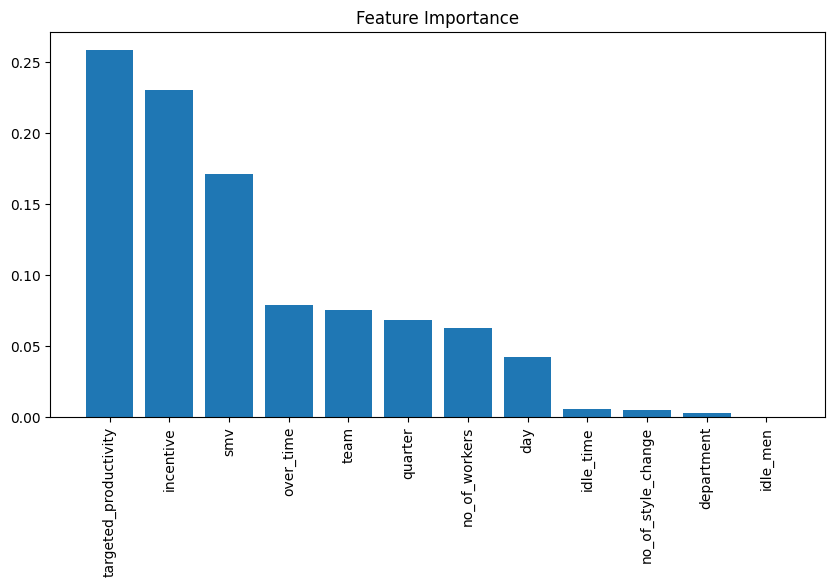

In [787]:
featureimportance("model/DT.pkl", features)

targeted_productivity - 0.1954%
incentive - 0.1734%
smv - 0.1266%
over_time - 0.1024%
team - 0.1015%
no_of_workers - 0.0888%
day - 0.0848%
quarter - 0.0729%
no_of_style_change - 0.0229%
department - 0.0228%
idle_men - 0.0049%
idle_time - 0.0037%


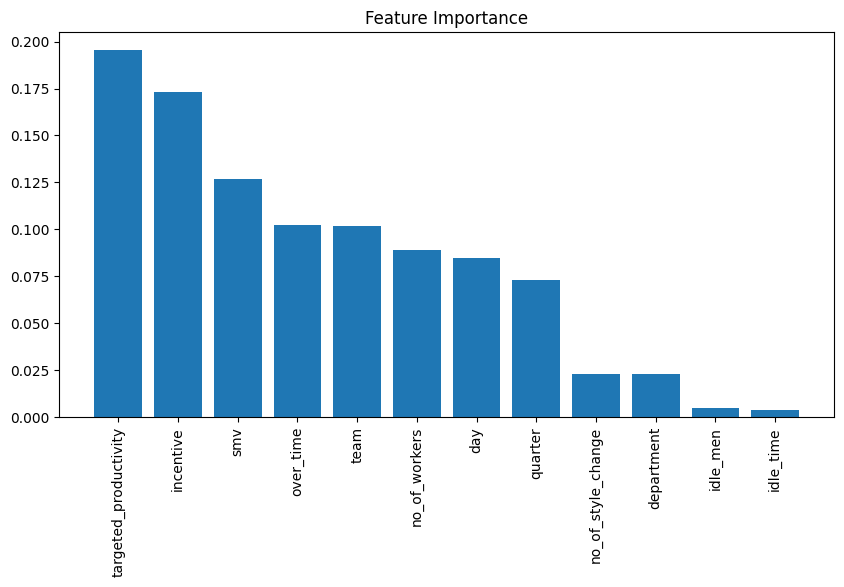

In [788]:
featureimportance("model/RF.pkl", features)

### Final Model & Prediction

In [789]:
final= pd.read_csv("./dataset/worker_productivity_cleantest.csv", skipinitialspace= True)
final.shape

(18, 15)

In [790]:
finalx= final.drop(["actual_productivity", "productivity", "date"], axis= 1).to_numpy()
finaly= final["productivity"].to_numpy()
print(finalx.shape, "\n", finaly.shape)

(18, 12) 
 (18,)


In [791]:
def predict_original_match(model= ""):
    #Initialize lists to store the predicted and original labels
    prediction= []
    orginal= []
    
    #Load the model
    model= joblib.load(model)
    
    #Predict the model
    y_pred= model.predict(finalx)

    #Initialize a counter for the number of times the predicted labels match the original labels
    count= 0

    #Iterate through the predicted and original labels
    for i, y in zip(y_pred, finaly):
        prediction.append(i)
        orginal.append(y)

        #If the predicted label matches the original label, increment the counter
        if i == y:
            count += 1

    print("Predict: ", prediction)
    print("Original:", orginal)
    print(count, "/18")

In [792]:
predict_original_match("./model/LR.pkl")

Predict:  [0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0]
Original: [0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]
11 /18


In [793]:
predict_original_match("./model/DT.pkl")

Predict:  [0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]
Original: [0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]
15 /18


In [797]:
predict_original_match("./model/RF.pkl")

Predict:  [0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0]
Original: [0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]
15 /18


In [795]:
predict_original_match("./model/SVM.pkl")

Predict:  [0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1]
Original: [0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]
13 /18


In [796]:
#Initialize lists to store the predicted and original labels
prediction= []
orginal= []
    
#Load the model
cnn= models.load_model("./model/1DCNN.h5")
    
#Predict the model
y_pred= cnn.predict(finalx)

#Initialize a counter for the number of times the predicted labels match the original labels
count= 0
labels= [2, 1, 0]

#Iterate through the predicted and original labels
for i, y in zip(y_pred, finaly):
    #Invert the labels using the argmax function
    invertedy= np.argmax(y)
    invertedp= np.argmax(i)
    
    #Append the inverted labels to the lists
    prediction.append(labels[invertedp])
    orginal.append(labels[invertedy])
    if i.any() == y:
        count += 1

print("Predict: ", prediction)
print("Original:", orginal)
print(count, "/18")

Predict:  [2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 2]
Original: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8 /18


### In conclusion
The model highest accuracy is RF which is 0.782. Base the prediction using my clean test dataset my RF model has the best prediction with 15/18 correct predicted values.

However after futher analysis and research I have decide to use RF model as my final model. 

RF builds numerous decision trees, it has a lower overfitting risk than a single decision tree. The random forest approach decreases the variance of individual trees by averaging the predictions of numerous decision trees, resulting in a more robust model. Variance refers to the changes in the model when using different portions of the training data set. 

RF algorithm frequently achieves higher accuracy than a single decision tree by integrating the predictions of numerous decision trees. Random forests can also handle high-dimensional feature spaces and enormous numbers of training instances with ease.